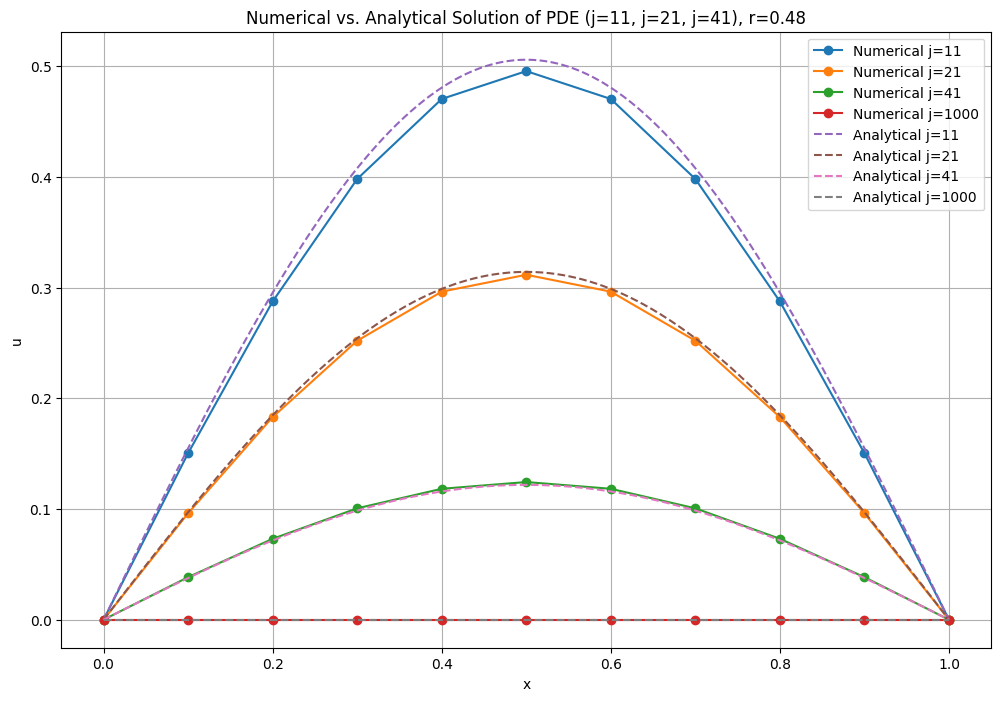

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Adjusted parameters
r = 0.48
h = 0.1
k = r * h**2  # Calculating k based on r and h

# Constants for the spatial domain and time steps
L = 1  # Length of the spatial domain
N = int(L / h)  # Number of spatial points
M = 1000  # Number of time points for visualization up to j=40

# Initial condition function
def initial_condition(x):
    if x <= 0.5:
        return 2 * x
    else:
        return 2 * (1 - x)

# Initialize u with zeros for the new computation
u = np.zeros((N+1, M+1))

# Apply initial and boundary conditions
for i in range(N+1):
    u[i, 0] = initial_condition(i * h)
u[0, :] = 0
u[N, :] = 0

# Construct the coefficient matrix A for the implicit scheme
A = np.diag((1 + 2*r) * np.ones(N-1)) - np.diag(r * np.ones(N-2), -1) - np.diag(r * np.ones(N-2), 1)

# Time-stepping solution using the implicit method
for j in range(M):
    # b is the vector from the previous timestep
    b = u[1:N, j]
    # Solve the system A*u[j+1] = b for u[j+1]
    u[1:N, j+1] = np.linalg.solve(A, b)

# Define the analytical solution with the corrected series terms
def analytical_solution(x, t, terms=100):
    sum_series = 0
    for n in range(1, terms+1):
        term = (1 / n**2) * np.sin(0.5 * n * np.pi) * np.sin(n * np.pi * x) * np.exp(-n**2 * np.pi**2 * t)
        sum_series += term
    return (8 / np.pi**2) * sum_series

# Adjusted plotting section
x_positions = np.linspace(0, L, N+1)
time_values = [10*k, 20*k, 40*k, 999*k]  # Physical times for j=11, 21, and 41

plt.figure(figsize=(12, 8))

# Plot numerical solutions
for j, t in zip([11, 21, 41, 1000], time_values):
    plt.plot(x_positions, u[:, j], 'o-', label=f'Numerical j={j}')

# Plot analytical solutions
for j, t in zip([11, 21, 41, 1000], time_values):
    analytical_vals = [analytical_solution(x, t) for x in np.linspace(0, 1, 500)]
    plt.plot(np.linspace(0, 1, 500), analytical_vals, label=f'Analytical j={j}', linestyle='--')

plt.xlabel('x')
plt.ylabel('u')
plt.title('Numerical vs. Analytical Solution of PDE (j=11, j=21, j=41), r=0.48')
plt.legend()
plt.grid(True)
plt.show()


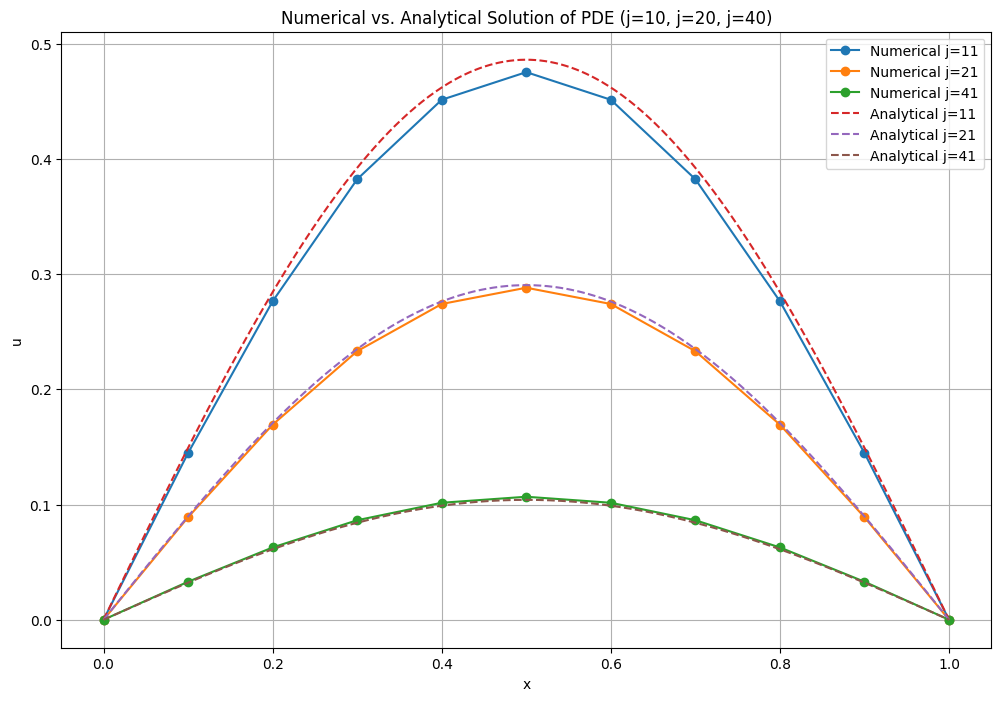

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Adjusted parameters
r = 0.52
h = 0.1
k = r * h**2  # Calculating k based on r and h

# Constants for the spatial domain and time steps
L = 1  # Length of the spatial domain
N = int(L / h)  # Number of spatial points
M = 50  # Number of time points for visualization up to j=40

# Initial condition function
def initial_condition(x):
    if x <= 0.5:
        return 2 * x
    else:
        return 2 * (1 - x)

# Initialize u with zeros for the new computation
u = np.zeros((N+1, M+1))

# Apply initial and boundary conditions
for i in range(N+1):
    u[i, 0] = initial_condition(i * h)
u[0, :] = 0
u[N, :] = 0

# Construct the coefficient matrix A for the implicit scheme
A = np.diag((1 + 2*r) * np.ones(N-1)) - np.diag(r * np.ones(N-2), -1) - np.diag(r * np.ones(N-2), 1)

# Time-stepping solution using the implicit method
for j in range(M):
    # b is the vector from the previous timestep
    b = u[1:N, j]
    # Solve the system A*u[j+1] = b for u[j+1]
    u[1:N, j+1] = np.linalg.solve(A, b)

# Define the analytical solution with the corrected series terms
def analytical_solution(x, t, terms=100):
    sum_series = 0
    for n in range(1, terms+1):
        term = (1 / n**2) * np.sin(0.5 * n * np.pi) * np.sin(n * np.pi * x) * np.exp(-n**2 * np.pi**2 * t)
        sum_series += term
    return (8 / np.pi**2) * sum_series

# Adjusted plotting section
x_positions = np.linspace(0, L, N+1)
time_values = [10*k, 20*k, 40*k]  # Physical times for j=11, 21, and 41

plt.figure(figsize=(12, 8))

# Plot numerical solutions
for j, t in zip([11, 21, 41], time_values):
    plt.plot(x_positions, u[:, j], 'o-', label=f'Numerical j={j}')

# Plot analytical solutions
for j, t in zip([11, 21, 41], time_values):
    analytical_vals = [analytical_solution(x, t) for x in np.linspace(0, 1, 500)]
    plt.plot(np.linspace(0, 1, 500), analytical_vals, label=f'Analytical j={j}', linestyle='--')

plt.xlabel('x')
plt.ylabel('u')
plt.title('Numerical vs. Analytical Solution of PDE (j=11, j=21, j=41), r=0.52')
plt.legend()
plt.grid(True)
plt.show()

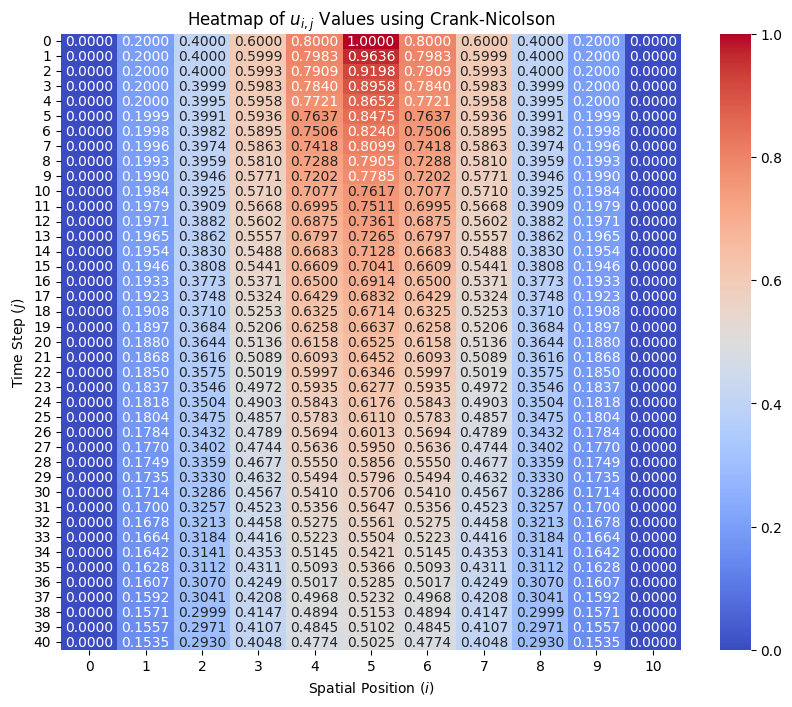

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
h = 0.1  # Spatial step size
k = 0.001  # Time step size
alpha = 1  # Assuming thermal diffusivity is 1 for simplicity
r = alpha * k / (2 * h**2)  # Adjusted for Crank-Nicolson
L = 1  # Length of the spatial domain
T = 0.1 # Total time to simulate
N = int(L / h)  # Number of spatial points
M = int(T / k)  # Number of time steps

# Initial condition function
def initial_condition(x):
    return 2 * x if x <= 0.5 else 2 * (1 - x)

# Initialize u with zeros
u = np.zeros((N+1, M+1))

# Apply initial condition
for i in range(N+1):
    u[i, 0] = initial_condition(i * h)

# Apply boundary conditions: u(0, t) = 0 and u(L, t) = 0 for all t
u[0, :] = 0
u[N, :] = 0

# Construct the coefficient matrix for Crank-Nicolson
A = np.zeros((N-1, N-1))
for i in range(N-1):
    A[i, i] = 1 + r
    if i > 0:
        A[i, i-1] = -r/2
    if i < N-2:
        A[i, i+1] = -r/2

# Time-stepping solution using the Crank-Nicolson method
for j in range(M):
    # Construct b vector
    b = np.zeros(N-1)
    for i in range(1, N):
        b[i-1] = r/2 * u[i+1, j] + (1 - r) * u[i, j] + r/2 * u[i-1, j]
    # Apply boundary conditions to b
    b[0] += r/2 * u[0, j+1]  # Left boundary
    b[-1] += r/2 * u[N, j+1]  # Right boundary
    # Solve the linear system
    u[1:N, j+1] = np.linalg.solve(A, b)

# Select a subset of time steps to display for clarity
display_steps = np.linspace(0, M, 41, dtype=int)
df_u = pd.DataFrame(u[:, display_steps])

# Transpose the DataFrame to have time steps as rows and spatial positions as columns
df_u_transposed = df_u.transpose()

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(df_u_transposed, annot=True, fmt=".4f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of $u_{i,j}$ Values using Crank-Nicolson")
plt.xlabel("Spatial Position ($i$)")
plt.ylabel("Time Step ($j$)")
plt.show()
